# L2 regularization
* The larger the scaling value, the sooner learning takes off
* Larger scaling values seem to apply an upper limit to how well the network learns

In [1]:
import random
from datetime import datetime

import torch
import numpy as np
import fastbook
from torch import tensor

import mnist
from monitoring import graph_updater
from math_funcs import get_accuracy, L2, Sigmoid
from network import Network

fastbook.setup_book()     

training_set, testing_set, validation_set = mnist.datasets(0.8)

1600 334 400


In [44]:
def run_batch(network, lr, batch):
    xs, expected = batch
    activations = network.forward(xs)
    output = activations[-1]
    grad = network.gradient(activations, expected)
    network.update(grad, lr)

    return get_accuracy(expected, output), network.cost(expected, output)


def run_epoch(network, dataset, lr):
    accuracy = []
    costs = []
    
    for batch in iter(dataset):
        a, c = run_batch(network, lr, batch)
        accuracy.append(a)
        costs.append(c)

    return tensor(accuracy).float().mean(), torch.stack(costs).mean()


def train(network, dataset, epochs, lr, show_progress=True):
    if show_progress:
        add_datapoint = graph_updater()
    
    for epoch in range(epochs):
        start = datetime.now()
        
        avg_accuracy, avg_cost = run_epoch(network, dataset, lr)
        
        if show_progress and (not epoch % 1):
            print(f'epoch {epoch}: accuracy={round(avg_accuracy.item(), 3)}, cost={round(avg_cost.item(), 3)}, time: {datetime.now() - start}')
            add_datapoint(avg_accuracy)
    
    return avg_accuracy, avg_cost

In [60]:
n = Network((28*28, 100, 10))

(tensor(0.6075), tensor(0.2771))

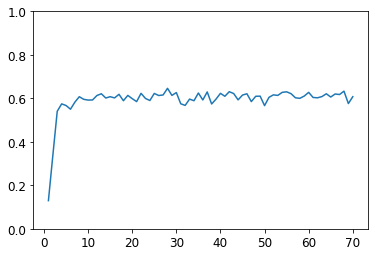

In [26]:
#data = mnist.sample(len(training_set.dataset), 64)
n_items = 2000
n = Network((28*28, 100, 10), regularizator=L2, regularization_term=5/n_items)
data = mnist.sample(n_items, 10)
train(n, data, epochs=70, lr=3)

(tensor(0.8425), tensor(0.1213))

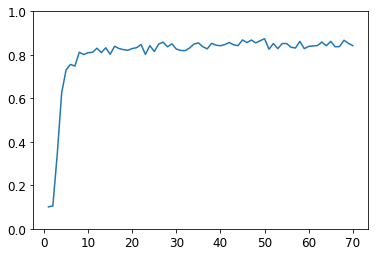

In [27]:
n_items = 2000
n = Network((28*28, 100, 10), regularizator=L2, regularization_term=1/n_items)
data = mnist.sample(n_items, 10)
train(n, data, epochs=70, lr=3)

(tensor(0.8320), tensor(0.1355))

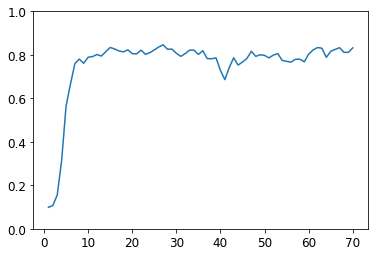

In [28]:
n_items = 2000
n = Network((28*28, 100, 10), regularizator=L2, regularization_term=0.5/n_items)
data = mnist.sample(n_items, 10)
train(n, data, epochs=70, lr=3)

(tensor(0.7870), tensor(0.1671))

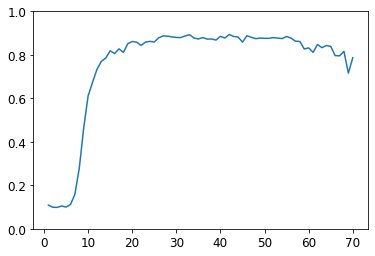

In [29]:
n_items = 2000
n = Network((28*28, 100, 10), regularizator=L2, regularization_term=0.1/n_items)
data = mnist.sample(n_items, 10)
train(n, data, epochs=70, lr=3)